Question 7 Using the data from Question 4, write code to analyze the data and answer the following questions 
Note 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000 
● Get all the earth meteorites co-ordinates who fell before the year 1970 
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [2]:
import requests
import json
from datetime import datetime
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Sending a GET request to the NASA API endpoint
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)
data = response.json()
# Read the dataset
df = pd.read_json('https://data.nasa.gov/resource/y77d-th95.json')

In [18]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN
996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011-01-01,29.48195,-7.61123,"{'type': 'Point', 'coordinates': [-7.61123, 29...",NaN,NaN
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN


In [3]:
df['year'] = pd.to_datetime(df['year'], errors='coerce')

In [21]:
crd_1 = []
crd_2 = []
for i in df['geolocation']:
    if type(i)==dict:
        crd_1.append(i['coordinates'][0])
        crd_2.append(i['coordinates'][1])
    else:
        crd_1.append(i)
        crd_2.append(i)
# creating two coord columns from geolocation
df['coord_1'] = crd_1
df['coord_2'] = crd_2

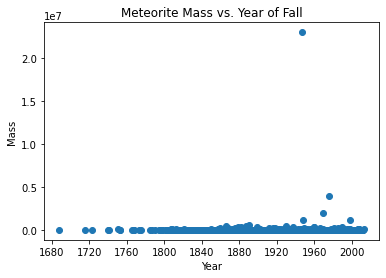

In [22]:
plt.scatter(df['year'], df['mass'])
plt.xlabel('Year')
plt.ylabel('Mass')
plt.title('Meteorite Mass vs. Year of Fall')
plt.show()

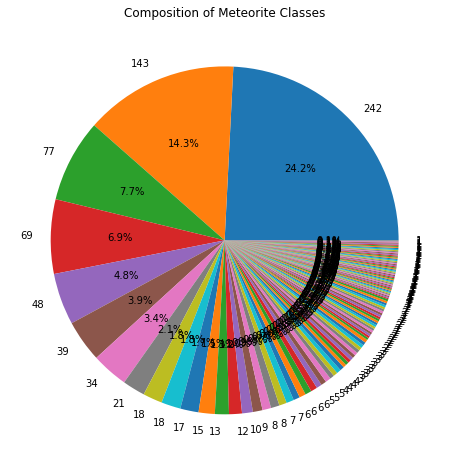

In [29]:
plt.figure(figsize=(12, 8))
class_counts = df['recclass'].value_counts()
plt.pie(class_counts.values, labels=class_counts, autopct='%1.1f%%')
plt.title('Composition of Meteorite Classes')
plt.show()

### Get all the Earth meteorites that fell before the year 2000

In [23]:
earth_meteorites = df[df['nametype']=='Valid']
meteorites_2000 = earth_meteorites[earth_meteorites['year'].dt.year < 2000]

In [24]:
meteorites_2000['name']

0         Aachen
1         Aarhus
2           Abee
3       Acapulco
4        Achiras
         ...    
994     Timochin
995     Tirupati
997        Tjabe
998     Tjerebon
999    Tomakovka
Name: name, Length: 912, dtype: object

 ### Get all the earth meteorites co-ordinates who fell before the year 1970 

In [25]:
meteorites_1970 = earth_meteorites[earth_meteorites['year'].dt.year < 1970]
coords_1970 = meteorites_1970[['reclat', 'reclong']]

In [26]:
coords_1970

,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
4,-33.16667,-64.95000
5,32.10000,71.80000
...,...,...
994,54.50000,35.20000
995,13.63333,79.41667
997,-7.08333,111.53333
998,-6.66667,106.58333


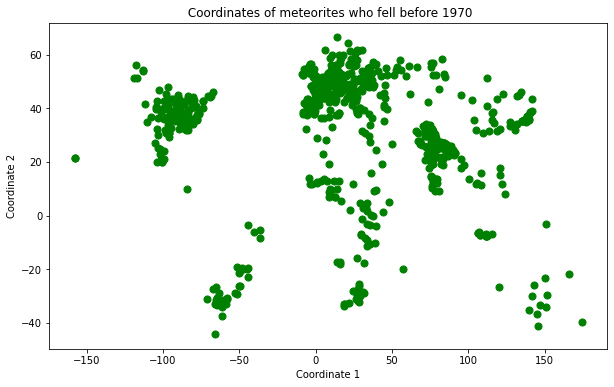

In [27]:
coordinate_1=meteorites_1970['coord_1']
coordinate_2=meteorites_1970['coord_2']
plt.figure(figsize=(10, 6))
plt.scatter(coordinate_1,coordinate_2,s=50,color='green')
plt.title(' Coordinates of meteorites who fell before 1970')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.show()

### Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [14]:
earth_meteorites_10000 = df[(df['mass'].astype(float) > 10000)]
earth_meteorites_10000[]

2            Abee
7            Agen
11            Aïr
16        Akyumak
27     Alfianello
          ...    
991     Tieschitz
992        Tilden
994      Timochin
997         Tjabe
998      Tjerebon
Name: name, Length: 243, dtype: object